# Country wide Covid19 Dataset

In [49]:
!pip install folium

In [50]:
!pip install pycountry_convert

In [51]:
# Load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import pycountry_convert as pc
import warnings
from datetime import datetime, timedelta, date
warnings.filterwarnings('ignore')

%matplotlib inline

In [52]:
# import covid19 confirmed cases datatset
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [53]:
# rename some columns
df_confirmed = df_confirmed.rename(columns={"Country/Region": "Country", "Province/State": "State"})
df_confirmed.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675


In [54]:
# import covid19 deaths datatset
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')


In [55]:
# rename some columns
df_deaths = df_deaths.rename(columns={"Country/Region": "Country", "Province/State": "State"})
df_deaths.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,319,321,322,324,327,330,334,338,340,343
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1562,1571,1581,1591,1599,1605,1612,1620,1632,1645
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,120,124,126,130,131,132,134,136,139,143


In [56]:
# import covid19 datatset
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

# drop columns that are not required
df_covid19.drop(['Last_Update', 'People_Tested', 'People_Hospitalized', 'UID', 'ISO3'], inplace=True, axis=1)

# change column name
df_covid19 = df_covid19.rename(columns={"Country_Region": "Country"})
df_covid19.head()


,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
0,Afghanistan,33.93911,67.709953,38872.0,1436.0,32505.0,4931.0,99.855270,3.694176
1,Albania,41.15330,20.168300,11816.0,343.0,6733.0,4740.0,410.591424,2.902844
2,Algeria,28.03390,1.659600,48966.0,1645.0,34517.0,12804.0,111.664391,3.359474
3,Andorra,42.50630,1.521800,1483.0,53.0,1054.0,376.0,1919.368407,3.573837
4,Angola,-11.20270,17.873900,3675.0,143.0,1401.0,2131.0,11.181677,3.891156


In [57]:
# Let's see info about the dataset
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         188 non-null    object 
 1   Lat             186 non-null    float64
 2   Long_           186 non-null    float64
 3   Confirmed       188 non-null    float64
 4   Deaths          188 non-null    float64
 5   Recovered       185 non-null    float64
 6   Active          188 non-null    float64
 7   Incident_Rate   186 non-null    float64
 8   Mortality_Rate  188 non-null    float64
dtypes: float64(8), object(1)
memory usage: 13.3+ KB


In [58]:
# Changing the conuntry names as required by pycountry_convert library
df_confirmed.loc[df_confirmed['Country'] == "US", "Country"] = "USA"
df_deaths.loc[df_deaths['Country'] == "US", "Country"] = "USA"
df_covid19.loc[df_covid19['Country'] == "US", "Country"] = "USA"


df_confirmed.loc[df_confirmed['Country'] == 'Korea, South', "Country"] = 'South Korea'
df_deaths.loc[df_deaths['Country'] == 'Korea, South', "Country"] = 'South Korea'
df_covid19.loc[df_covid19['Country'] == "Korea, South", "Country"] = "South Korea"

df_confirmed.loc[df_confirmed['Country'] == 'Taiwan*', "Country"] = 'Taiwan'
df_deaths.loc[df_deaths['Country'] == 'Taiwan*', "Country"] = 'Taiwan'
df_covid19.loc[df_covid19['Country'] == "Taiwan*", "Country"] = "Taiwan"

df_confirmed.loc[df_confirmed['Country'] == 'Congo (Kinshasa)', "Country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['Country'] == 'Congo (Kinshasa)', "Country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['Country'] == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"

df_confirmed.loc[df_confirmed['Country'] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['Country'] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['Country'] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['Country'] == "Reunion", "Country"] = "Réunion"
df_deaths.loc[df_deaths['Country'] == "Reunion", "Country"] = "Réunion"
df_covid19.loc[df_covid19['Country'] == "Reunion", "Country"] = "Réunion"

df_confirmed.loc[df_confirmed['Country'] == 'Congo (Brazzaville)', "Country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['Country'] == 'Congo (Brazzaville)', "Country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['Country'] == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"

df_confirmed.loc[df_confirmed['Country'] == 'Bahamas, The', "Country"] = 'Bahamas'
df_deaths.loc[df_deaths['Country'] == 'Bahamas, The', "Country"] = 'Bahamas'
df_covid19.loc[df_covid19['Country'] == "Bahamas, The", "Country"] = "Bahamas"

df_confirmed.loc[df_confirmed['Country'] == 'Gambia, The', "Country"] = 'Gambia'
df_deaths.loc[df_deaths['Country'] == 'Gambia, The', "Country"] = 'Gambia'
df_covid19.loc[df_covid19['Country'] == "Gambia, The", "Country"] = "Gambia"

In [59]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'OTH' : 'Others'
}

In [60]:
# function to find the continent of the country supplied
def country_to_continent(country):
    try:
        continent_code = pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except:
        continent_code = 'OTH'
    return continents[continent_code]

In [61]:
# extracting the countries columns from all the 3 datasets 
countries_covid19 = np.asarray(df_covid19["Country"])
countries_confirmed = np.asarray(df_confirmed["Country"])
countries_deaths = np.asarray(df_deaths["Country"])

In [62]:
# applying the above function to all the 3 datasets to find the continents of the respective countries
df_covid19.insert(1,"Continent",  [country_to_continent(country) for country in countries_covid19])
df_confirmed.insert(1,"Continent",  [country_to_continent(country) for country in countries_confirmed])
df_deaths.insert(1,"Continent",  [country_to_continent(country) for country in countries_deaths])

In [63]:
df_global = df_covid19.drop(['Country', 'Continent', 'Lat', 'Long_', 'Incident_Rate', 'Mortality_Rate'], axis=1)

In [64]:
df_global_cases = pd.DataFrame(pd.to_numeric(df_global.sum()), dtype=np.float64).transpose()
df_global_cases['Mortality_Rate'] = np.round((df_global_cases["Deaths"]/df_global_cases["Confirmed"])*100,2)
df_global_cases

,Confirmed,Deaths,Recovered,Active,Mortality_Rate
0,29886196.0,941079.0,20330906.0,8613888.0,3.15


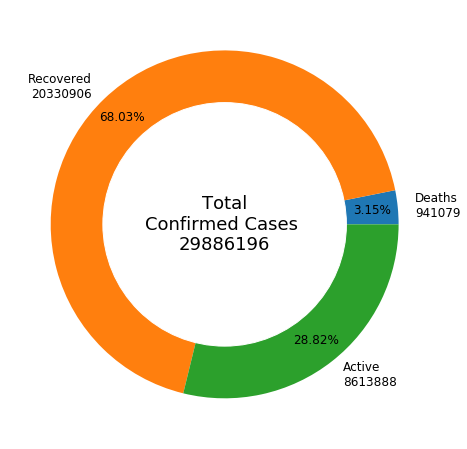

In [65]:
# The following Pie Chart shows the breakdown of Total Confirmed Cases into Active, Recovered and Deaths
labels =  [df_global_cases.columns[i]+ "\n" + str(int(df_global_cases.values[0][i])) for i in range(1,4)]
values = [df_global_cases.values[0][i] for i in range(1,4)]
plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct='%1.2f%%', pctdistance=0.85, labeldistance=1.1, textprops = {'fontsize':12})
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0, 0, "Total\nConfirmed Cases \n"+str(int(df_global_cases.values[0][0])), horizontalalignment='center', verticalalignment='center', size=18)
plt.show()


In [66]:
# Global Spread Analysis of Covid19
# The following graph shows the spread of Covid19. 
# It shows how the number of confirmed cases and deaths have increased over time.

confirmed_cases = df_confirmed.drop(['Lat', 'Long', 'State', 'Country', 'Continent'], axis=1)
cases = confirmed_cases.sum().tolist()
cases = np.asarray(cases)

death_cases = df_deaths.drop(['Lat', 'Long', 'State', 'Country', 'Continent'], axis=1)
deaths = death_cases.sum().tolist()
deaths = np.asarray(deaths)

dates = confirmed_cases.columns
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in dates]

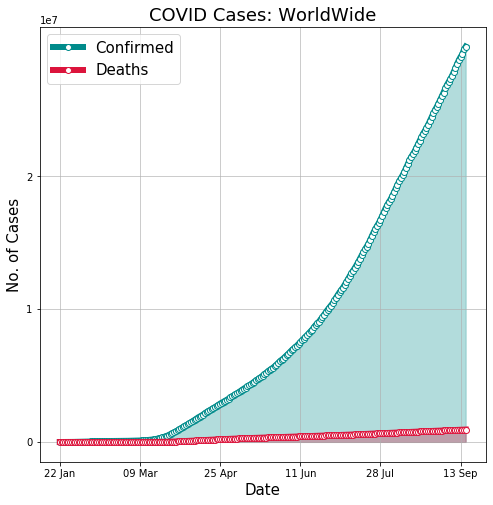

In [67]:
plt.figure(figsize=(8,8))
marker_style_confirmed = dict(c="darkcyan", linewidth=6, linestyle='-', marker='o', markersize=6, markerfacecolor='#ffffff')
marker_style_death = dict(c="crimson", linewidth=6, linestyle='-', marker='o', markersize=6, markerfacecolor='#ffffff')
plt.plot(d, cases, label = 'Confirmed', **marker_style_confirmed)
plt.plot(d, deaths, label = 'Deaths', **marker_style_death)
plt.fill_between(d, cases, color='darkcyan', alpha=0.3)
plt.fill_between(d, deaths, color='crimson', alpha=0.3)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("No. of Cases",fontsize = 15)
plt.title("COVID Cases: WorldWide", fontsize = 18)
plt.legend(loc= "best", fontsize = 15)
plt.grid(alpha=0.8)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))))
plt.yticks(np.arange(0, max(cases), 10**(len(str(int(max(cases))))-1)))
plt.show()

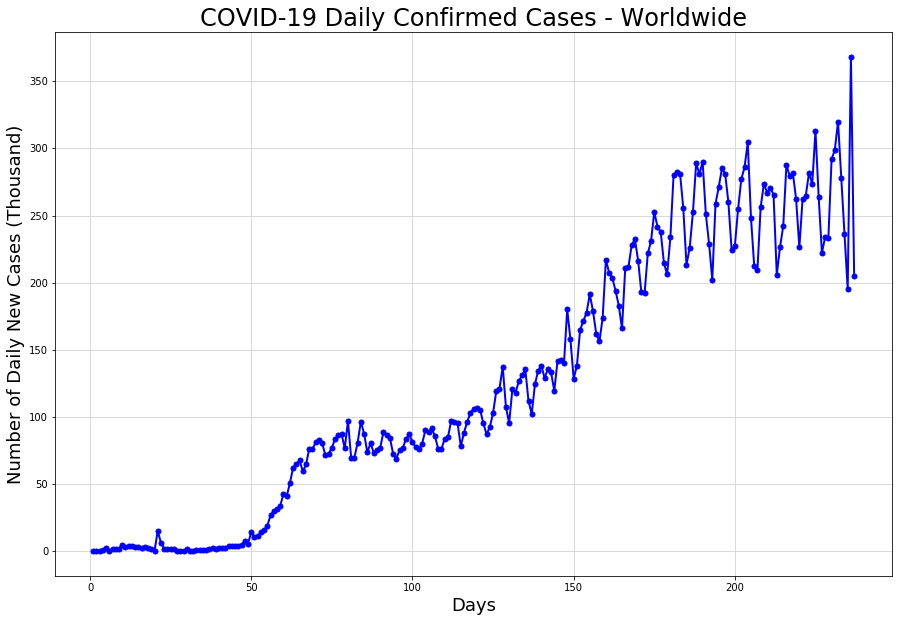

In [68]:
# Daily New Cases - Globally

daily_cases = np.nan_to_num(df_confirmed.sum()[5:].diff())
f = plt.figure(figsize=(15,10))
date = np.arange(0,len(daily_cases))
marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date, daily_cases/1000,"-.",color="blue",**marker_style)

# Grid Settings
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

#Title
plt.title("COVID-19 Daily Confirmed Cases - Worldwide",{'fontsize':24})

# Axis Label
plt.xlabel("Days",fontsize =18)
plt.ylabel("Number of Daily New Cases (Thousand)",fontsize =18)

plt.show()

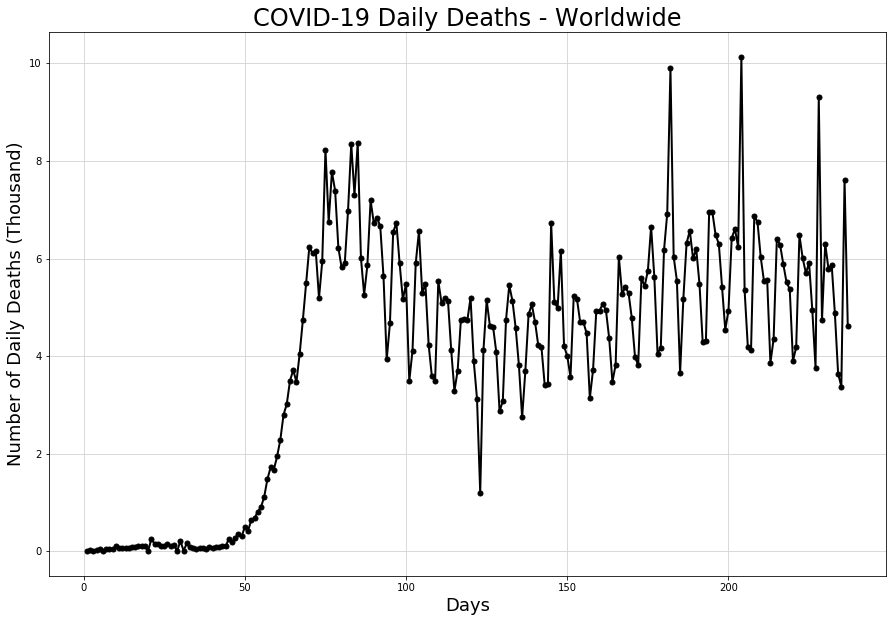

In [69]:
# Daily Deaths - Globally
daily_deaths = np.nan_to_num(df_deaths.sum()[5:].diff())
f = plt.figure(figsize=(15,10))
date = np.arange(0,len(daily_deaths))
marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date, daily_deaths/1000,"-.",color="black",**marker_style)

# Grid Settings
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

#Title
plt.title("COVID-19 Daily Deaths - Worldwide",{'fontsize':24})

# Axis Label
plt.xlabel("Days",fontsize =18)
plt.ylabel("Number of Daily Deaths (Thousand)",fontsize =18)

plt.show()

In [70]:
# Now, Continent-wise-Analysis
df_continents = df_covid19.drop(['Country', 'Lat', 'Long_', 'Incident_Rate', 'Mortality_Rate'], axis=1)

In [71]:
df_continents_cases = df_continents.groupby('Continent').sum()
df_continents_cases['Mortality_Rate'] = np.round((df_continents_cases["Deaths"]/df_continents_cases["Confirmed"])*100,2)
df_continents_cases.drop(['Others'], inplace=True)
df_continents_cases

,Confirmed,Deaths,Recovered,Active,Mortality_Rate
Continent,,,,,
Africa,1373847.0,33252.0,1126909.0,213686.0,2.42
Asia,8947493.0,169792.0,7261496.0,1516205.0,1.90
Australia,29170.0,865.0,25753.0,2552.0,2.97
Europe,4277892.0,214471.0,2190228.0,1872866.0,5.01
North America,7932971.0,289472.0,3532485.0,4111018.0,3.65
South America,7274470.0,232434.0,6161433.0,880603.0,3.20


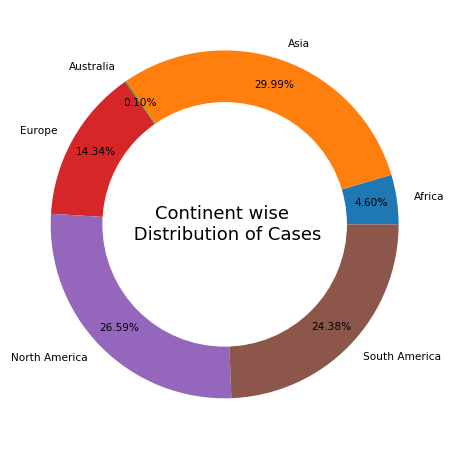

In [72]:
# Overview
labels = list(df_continents_cases.index)
sizes = df_continents_cases['Confirmed'].values
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', pctdistance=0.85, labeldistance=1.1, textprops = {'fontsize':10.5})
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0, 0, "Continent wise \n Distribution of Cases", horizontalalignment='center', verticalalignment='center', size=18)
plt.show()

In [73]:
# COVID19 Spread Analysis
df_confirmed_continents = df_confirmed.groupby('Continent').sum()
df_confirmed_continents = df_confirmed_continents[df_confirmed_continents.index!='Others']
df_confirmed_continents.drop(['Lat', 'Long'], inplace=True, axis=1)

df_deaths_continents = df_deaths.groupby('Continent').sum()
df_deaths_continents = df_deaths_continents[df_deaths_continents.index!='Others']
df_deaths_continents.drop(['Lat', 'Long'], inplace=True, axis=1)

dates = df_confirmed_continents.columns
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in dates]

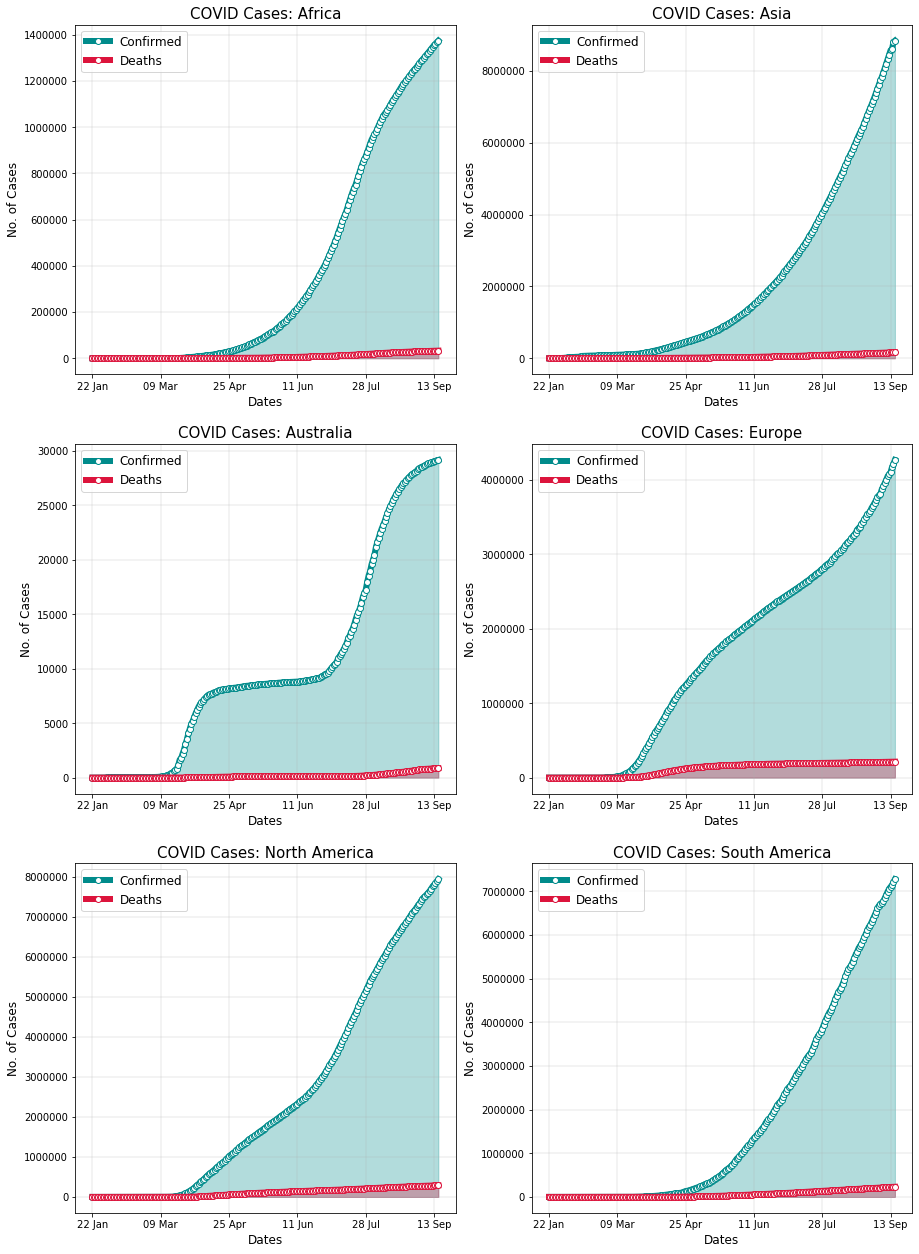

In [74]:
marker_style_confirmed = dict(c="darkcyan", linewidth=6, linestyle='-', marker='o', markersize=6, markerfacecolor='#ffffff')
marker_style_death = dict(c="crimson", linewidth=6, linestyle='-', marker='o', markersize=6, markerfacecolor='#ffffff')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
plt.subplots_adjust(top = 1.2, bottom = 0.1)
i=0
for rows in axes:
    for ax1 in rows:
        ax1.plot(d, df_confirmed_continents.iloc[i], label = 'Confirmed', **marker_style_confirmed)
        ax1.plot(d, df_deaths_continents.iloc[i], label = 'Deaths', **marker_style_death)
        ax1.fill_between(d, df_confirmed_continents.iloc[i], color='darkcyan', alpha=0.3)
        ax1.fill_between(d, df_deaths_continents.iloc[i], color='crimson', alpha=0.3)
        ax1.set_xlabel("Dates", fontsize = 12)
        ax1.set_ylabel("No. of Cases",fontsize = 12)
        ax1.set_title("COVID Cases: "+df_deaths_continents.index[i], fontsize = 15)
        ax1.legend(loc= "best", fontsize = 12)
        ax1.grid(which='major', linewidth = 0.3)
        ax1.set_xticks(list(np.arange(0,len(d),int(len(d)/5))))
        i+=1


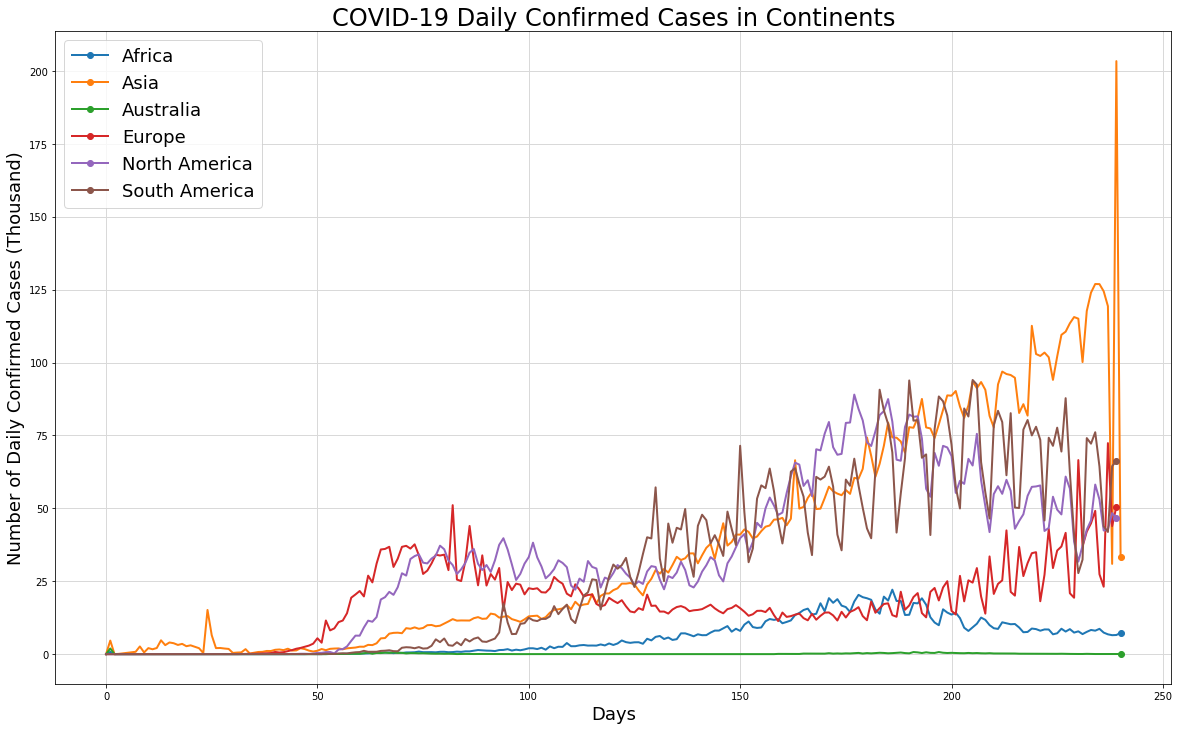

In [75]:
# Daily Confirmed Cases - Continents
daily_cases_continents = df_confirmed.groupby('Continent').sum().diff(axis=1).replace(np.nan,0)
daily_cases_continents = daily_cases_continents[daily_cases_continents.index!='Others']
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,continent in enumerate(daily_cases_continents.index):
    t = daily_cases_continents.loc[daily_cases_continents.index == continent].values[0]
    t = t[t>=0]
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/1000,'-o',label = continent,linewidth =2, markevery=[-1])
    
    # Grid Settings
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

#Title
plt.title("COVID-19 Daily Confirmed Cases in Continents",{'fontsize':24})

# Axis Label
plt.xlabel("Days",fontsize =18)
plt.ylabel("Number of Daily Confirmed Cases (Thousand)",fontsize =18)

# Legend
plt.legend(fontsize=18)

plt.show()

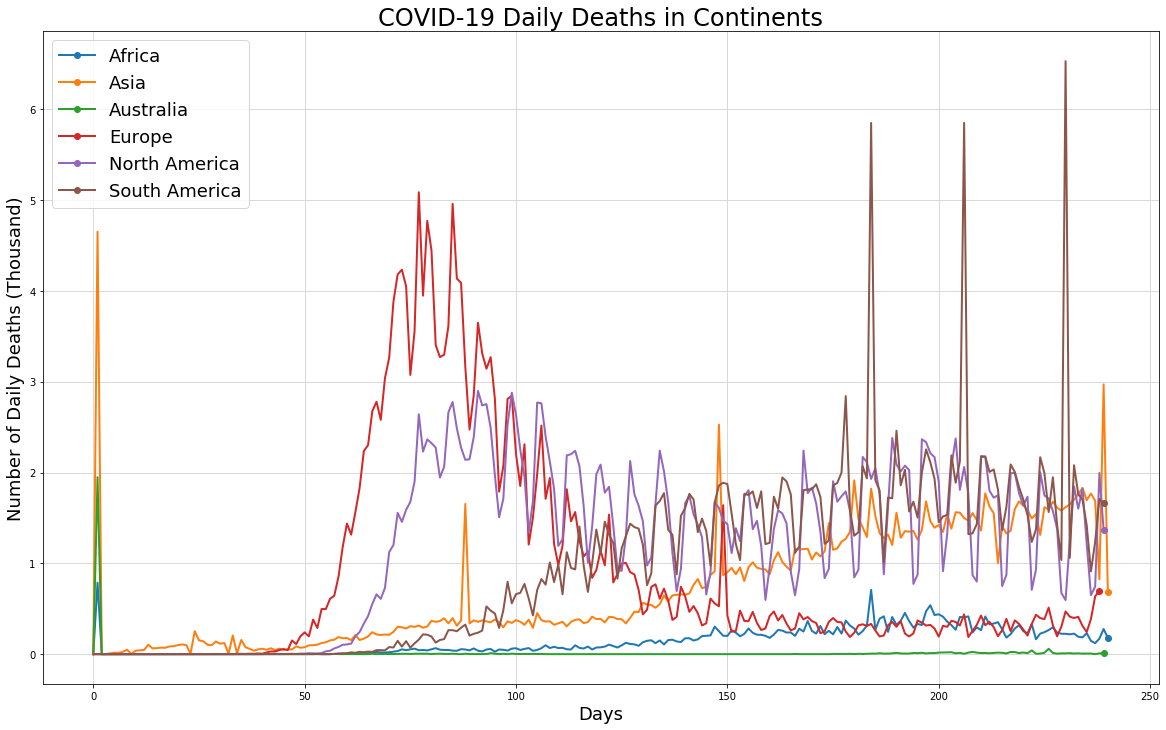

In [76]:
# Daily Deaths - Continents

daily_deaths_continents = df_deaths.groupby('Continent').sum().diff(axis=1).replace(np.nan,0)
daily_deaths_continents = daily_deaths_continents[daily_deaths_continents.index!='Others']
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,continent in enumerate(daily_deaths_continents.index):
    t = daily_deaths_continents.loc[daily_deaths_continents.index == continent].values[0]
    t = t[t>=0]
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/1000,'-o',label = continent,linewidth =2, markevery=[-1])
    
    
# Grid Settings
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

#Title
plt.title("COVID-19 Daily Deaths in Continents",{'fontsize':24})

# Axis Label
plt.xlabel("Days",fontsize =18)
plt.ylabel("Number of Daily Deaths (Thousand)",fontsize =18)

# Legend
plt.legend(fontsize=18)

plt.show()

In [77]:
# Let's see Visualization on World Map
df_continents_cases['Latitude'] = [6.426117205286786, 44.94789322476297, -25.734968546496344, 44.94789322476297, 56.51520886670177, -31.065922730080157]
df_continents_cases['Longitude'] = [18.2766152761759, 95.7503726784575, 134.489562782425, 28.2490403487619, -92.32043635079269, -60.7921128171538]
df_continents_cases.head()

,Confirmed,Deaths,Recovered,Active,Mortality_Rate,Latitude,Longitude
Continent,,,,,,,
Africa,1373847.0,33252.0,1126909.0,213686.0,2.42,6.426117,18.276615
Asia,8947493.0,169792.0,7261496.0,1516205.0,1.90,44.947893,95.750373
Australia,29170.0,865.0,25753.0,2552.0,2.97,-25.734969,134.489563
Europe,4277892.0,214471.0,2190228.0,1872866.0,5.01,44.947893,28.249040
North America,7932971.0,289472.0,3532485.0,4111018.0,3.65,56.515209,-92.320436


In [78]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2, max_zoom=6, min_zoom=2)
for i in range(0, len(df_continents_cases)):
    folium.Circle(
        location=[df_continents_cases.iloc[i]['Latitude'], df_continents_cases.iloc[i]['Longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_continents_cases.index[i]+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Active: "+str(df_continents_cases['Active'][i])+"</li>"+
        "<li>Confirmed: "+str(df_continents_cases['Confirmed'][i])+"</li>"+
        "<li>Deaths:   "+str(df_continents_cases['Deaths'][i])+"</li>"+
        "</ul>",
        radius=(int((np.log(df_continents_cases['Confirmed'][i]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)
world_map

In [79]:
# Let's see Country-wise-Analysis
df_country = df_covid19.drop(['Continent', 'Lat', 'Long_', 'Incident_Rate', 'Mortality_Rate'], axis=1)
df_country.index = df_country["Country"]
df_country.drop(['Country'], axis=1, inplace=True)
df_country.fillna(0,inplace=True)

In [80]:
df_country['Mortality_Rate'] = np.round((df_country["Deaths"]/df_country["Confirmed"])*100,2)
df_country

,Confirmed,Deaths,Recovered,Active,Mortality_Rate
Country,,,,,
Afghanistan,38872.0,1436.0,32505.0,4931.0,3.69
Albania,11816.0,343.0,6733.0,4740.0,2.90
Algeria,48966.0,1645.0,34517.0,12804.0,3.36
Andorra,1483.0,53.0,1054.0,376.0,3.57
Angola,3675.0,143.0,1401.0,2131.0,3.89
...,...,...,...,...,...
West Bank and Gaza,33006.0,243.0,22209.0,10554.0,0.74
Western Sahara,10.0,1.0,8.0,1.0,10.00
Yemen,2019.0,583.0,1221.0,215.0,28.88


In [81]:
# function for plotting horizontal bar plot
def horizontal_barplot(x, y, title, xlabel, ylabel, color):
    fig = plt.figure(figsize = (10,5))
    fig.add_subplot(111)
    plt.axes(axisbelow = True)
    plt.barh(x.index[-10:], y.values[-10:], color = color)
    plt.tick_params(size = 5, labelsize = 13)
    plt.xlabel(xlabel, fontsize = 18)
    plt.ylabel(ylabel,fontsize = 18)
    plt.title(title,fontsize = 20)
    plt.grid(alpha = 0.3)
    plt.show()

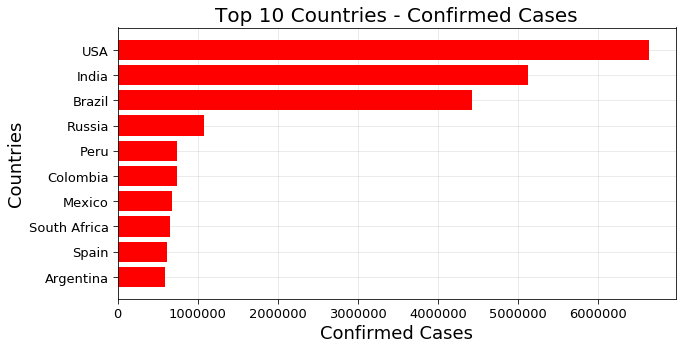

In [82]:
# Let's see Top 10 Countries - Confirmed Cases
horizontal_barplot(x = df_country.sort_values('Confirmed')["Confirmed"], 
                   y = df_country.sort_values('Confirmed')["Confirmed"], 
                   title = "Top 10 Countries - Confirmed Cases", 
                   xlabel = "Confirmed Cases", 
                   ylabel = "Countries", 
                   color = "red")

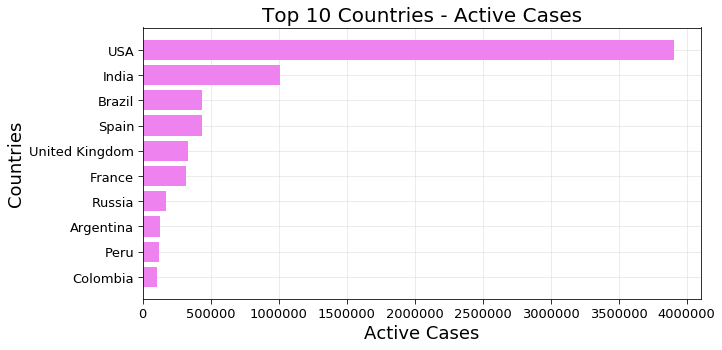

In [83]:
# Top 10 Countries - Active Cases
horizontal_barplot(x = df_country.sort_values('Active')["Active"], 
                   y = df_country.sort_values('Active')["Active"], 
                   title = "Top 10 Countries - Active Cases", 
                   xlabel = "Active Cases", 
                   ylabel = "Countries", 
                   color = "violet")

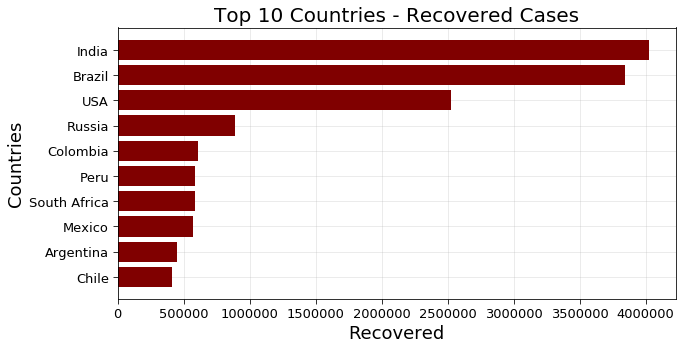

In [84]:
# Top 10 Countries - Recovered Cases
horizontal_barplot(x = df_country.sort_values('Recovered')["Recovered"], 
                   y = df_country.sort_values('Recovered')["Recovered"], 
                   title = "Top 10 Countries - Recovered Cases", 
                   xlabel = "Recovered", 
                   ylabel = "Countries", 
                   color = "maroon")

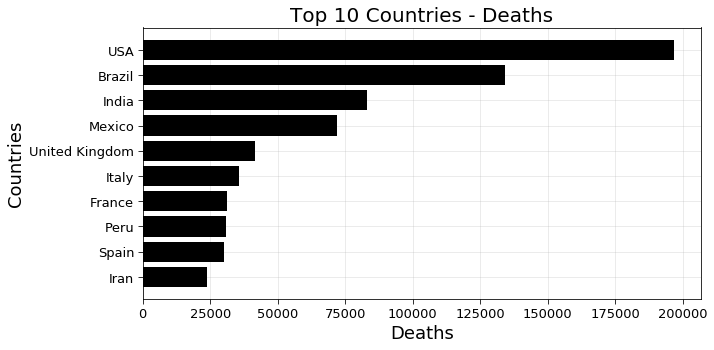

In [85]:
# Let's see Top 10 Countries - Deaths
horizontal_barplot(x = df_country.sort_values('Deaths')["Deaths"], 
                   y = df_country.sort_values('Deaths')["Deaths"], 
                   title = "Top 10 Countries - Deaths", 
                   xlabel = "Deaths", 
                   ylabel = "Countries", 
                   color = "black")

In [86]:
# Let's see Visualization on World Map
df_countries = df_covid19.drop(['Continent', 'Incident_Rate', 'Mortality_Rate'], axis=1)
df_countries.index = df_countries["Country"]
df_countries.fillna(0,inplace=True)
df_countries.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active
Country,,,,,,,
Afghanistan,Afghanistan,33.93911,67.709953,38872.0,1436.0,32505.0,4931.0
Albania,Albania,41.15330,20.168300,11816.0,343.0,6733.0,4740.0
Algeria,Algeria,28.03390,1.659600,48966.0,1645.0,34517.0,12804.0
Andorra,Andorra,42.50630,1.521800,1483.0,53.0,1054.0,376.0
Angola,Angola,-11.20270,17.873900,3675.0,143.0,1401.0,2131.0


In [87]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2, max_zoom=6, min_zoom=2)
for i in range(0, len(df_countries)):
    folium.Circle(
        location=[df_countries.iloc[i]['Lat'], df_countries.iloc[i]['Long_']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_countries.index[i]+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Active: "+str(df_countries['Active'][i])+"</li>"+
        "<li>Confirmed: "+str(df_countries['Confirmed'][i])+"</li>"+
        "<li>Deaths:   "+str(df_countries['Deaths'][i])+"</li>"+
        "</ul>",
        radius=(int((np.log(df_countries['Confirmed'][i]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)
world_map

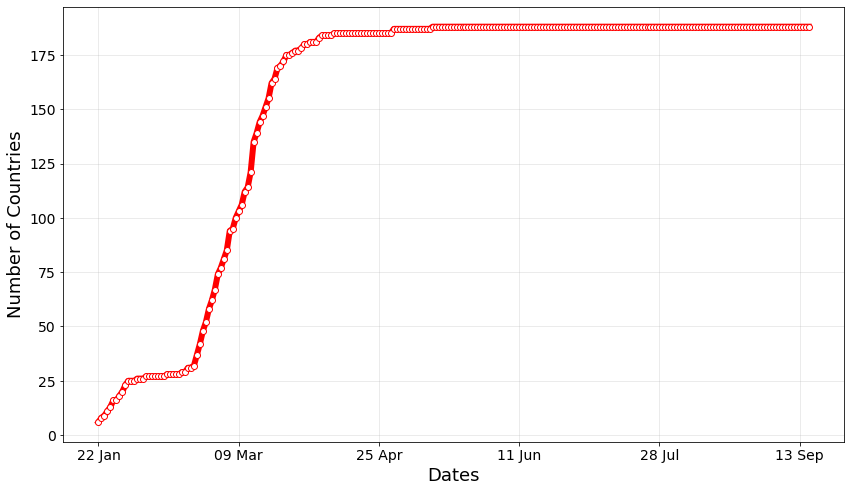

In [88]:
# Number of Countries affected by COVID19 over time

case_nums_country = df_confirmed.groupby("Country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(14,8))
f.add_subplot(111)
marker_style = dict(c="red",linewidth=6, linestyle='-', marker='o',markersize=6, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries",fontsize=18)
plt.grid(alpha = 0.3)
plt.show()


In [89]:
# COVID19 Spread Analysis

df_countries_cases = df_confirmed.groupby(["Country"]).sum()
df_countries_deaths = df_deaths.groupby(["Country"]).sum()

df_countries_cases.drop(['Lat', 'Long'], inplace=True, axis=1)
df_countries_deaths.drop(['Lat', 'Long'], inplace=True, axis=1)

df_countries_cases = df_countries_cases.sort_values(df_confirmed.columns[-1],ascending = False)[:20]

dates = df_countries_cases.columns
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in dates]

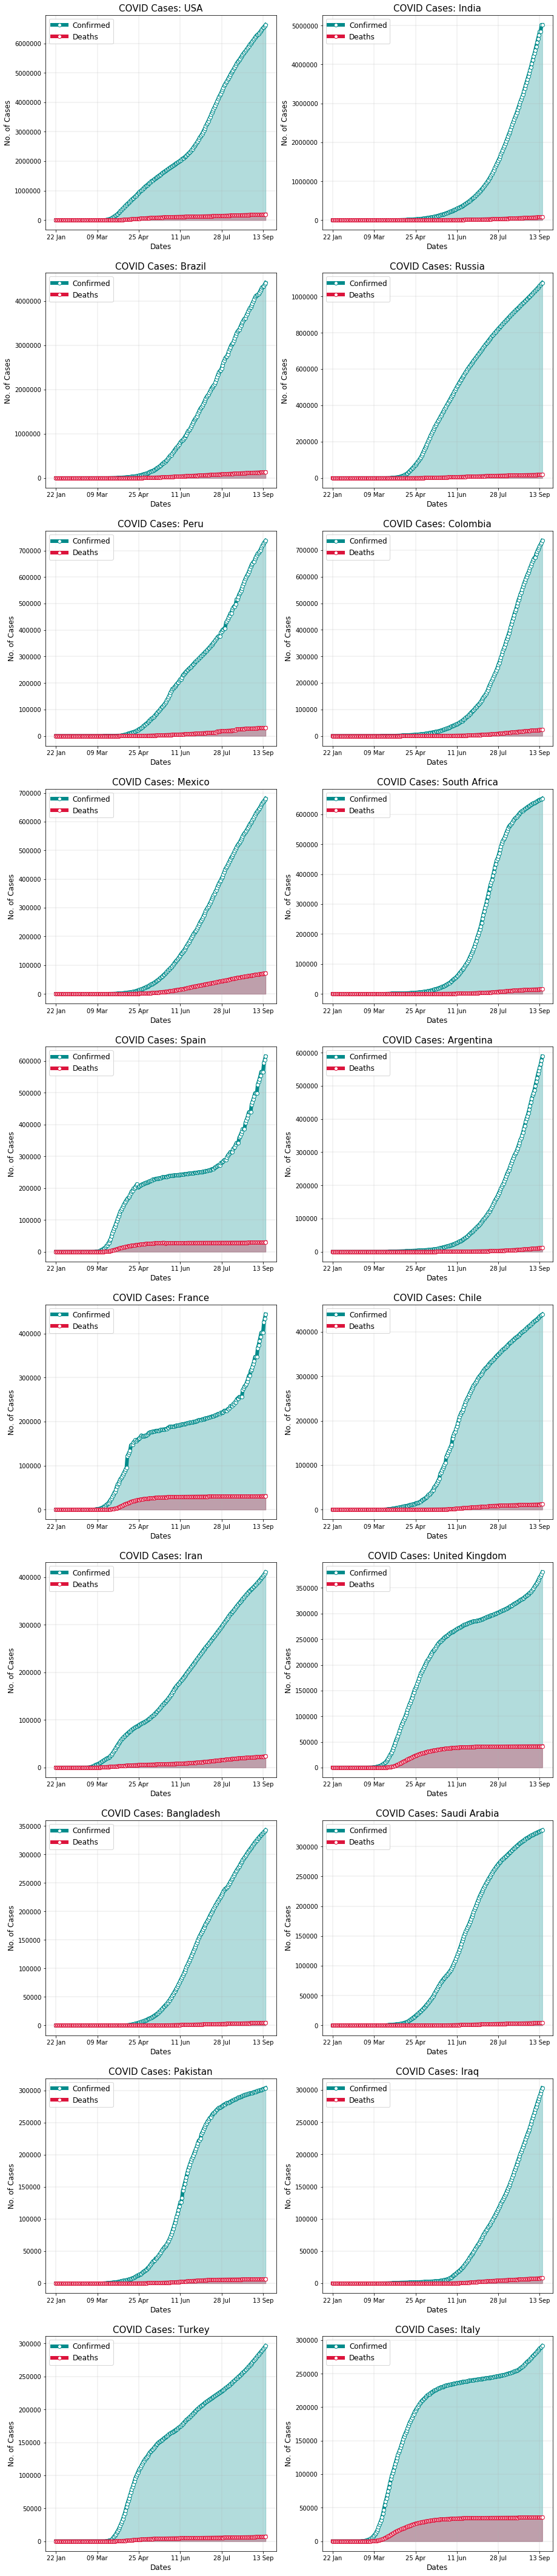

In [90]:
marker_style_confirmed = dict(c="darkcyan", linewidth=6, linestyle='-', marker='o', markersize=6, markerfacecolor='#ffffff')
marker_style_death = dict(c="crimson", linewidth=6, linestyle='-', marker='o', markersize=6, markerfacecolor='#ffffff')
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15,15))
plt.subplots_adjust(top = 4.0)
i=0
for rows in axes:
    for ax1 in rows:
        ax1.plot(d, df_countries_cases.iloc[i], label = 'Confirmed', **marker_style_confirmed)
        ax1.plot(d, df_countries_deaths[df_countries_deaths.index == df_countries_cases.index[i]].values[0], label = 'Deaths', **marker_style_death)
        ax1.fill_between(d, df_countries_cases.iloc[i], color='darkcyan', alpha=0.3)
        ax1.fill_between(d, df_countries_deaths[df_countries_deaths.index == df_countries_cases.index[i]].values[0], color='crimson', alpha=0.3)
        ax1.set_xlabel("Dates", fontsize = 12)
        ax1.set_ylabel("No. of Cases",fontsize = 12)
        ax1.set_title("COVID Cases: "+df_countries_cases.index[i], fontsize = 15)
        ax1.legend(loc= "best", fontsize = 12)
        ax1.set_xticks(list(np.arange(0,len(d),int(len(d)/5))))
        ax1.grid(which='major', linewidth = 0.3)
        i+=1

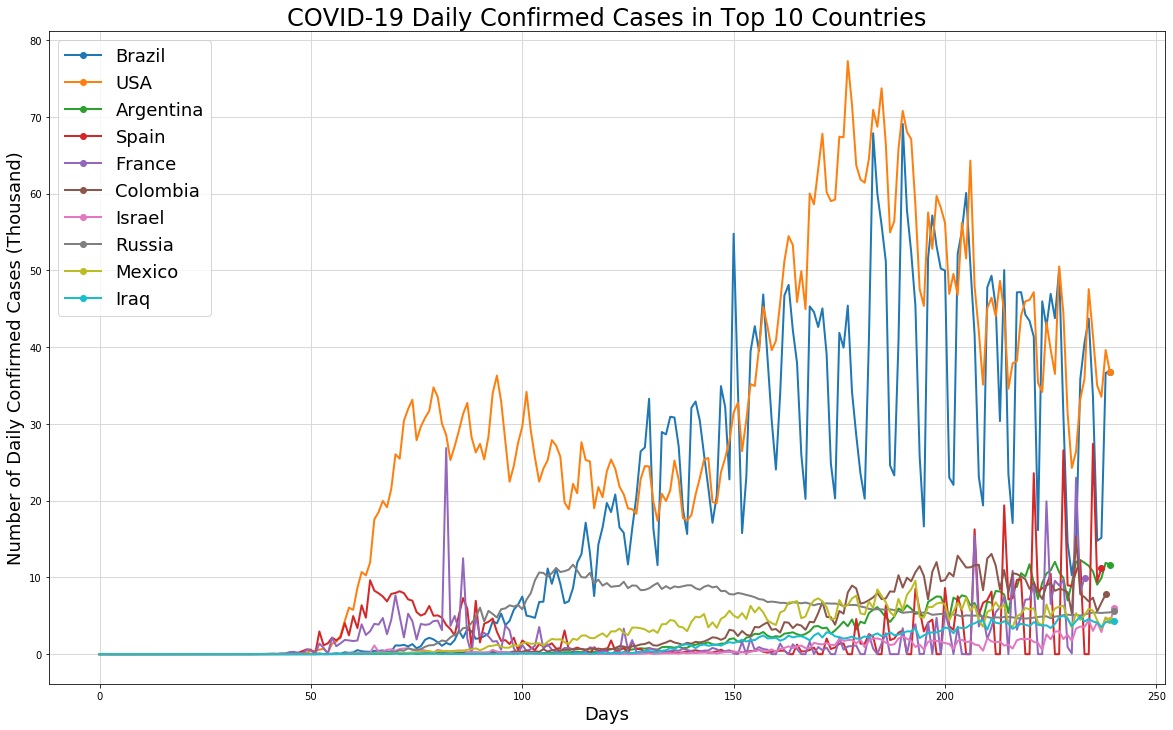

In [91]:
# Daily Confirmed cases - Top 10 Countries

temp = df_confirmed.groupby('Country').sum().diff(axis=1).sort_values(df_confirmed.columns[-1],ascending=False).head(10).replace(np.nan,0)
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index ==country].values[0]
    t = t[t>=0]
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/1000,'-o',label = country,linewidth =2, markevery=[-1])

# Grid Settings
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

#Title
plt.title("COVID-19 Daily Confirmed Cases in Top 10 Countries",{'fontsize':24})

# Axis Label
plt.xlabel("Days",fontsize =18)
plt.ylabel("Number of Daily Confirmed Cases (Thousand)",fontsize =18)

# Legend
plt.legend(fontsize=18)

plt.show()

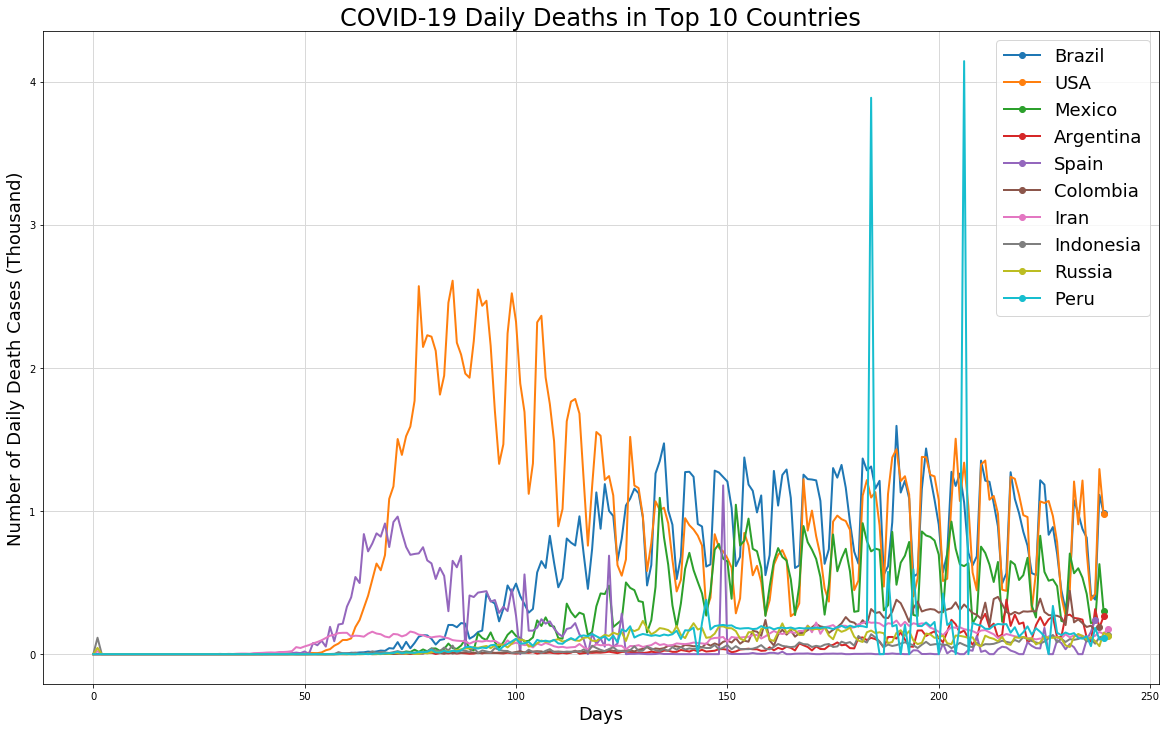

In [92]:
#Daily deaths - Top 10 Countries

temp = df_deaths.groupby('Country').sum().diff(axis=1).sort_values(df_deaths.columns[-1],ascending=False).head(10).replace(np.nan,0)
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index ==country].values[0]
    t = t[t>=0]
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/1000,'-o',label = country,linewidth =2, markevery=[-1])

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

#Title
plt.title("COVID-19 Daily Deaths in Top 10 Countries",{'fontsize':24})

# Axis Label
plt.xlabel("Days",fontsize =18)
plt.ylabel("Number of Daily Death Cases (Thousand)",fontsize =18)

# Legend
plt.legend(fontsize=18)

plt.show()
